In [1]:
!pip install xgboost

In [2]:
!pip install imblearn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\marketing_data.csv')

In [6]:
data.head()

,User_ID,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,...,coupon,deal,discount,exclusive,limited,new,offer,product,sale,shopping
0,1,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,Low,0,...,0.570089,0.000000,0.000000,0.000000,0.000000,0.000000,0.593544,0.000000,0.000000,0.0
1,2,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,High,1,...,0.000000,0.563362,0.000000,0.000000,0.000000,0.000000,0.594854,0.000000,0.000000,0.0
2,3,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,Low,1,...,0.000000,0.000000,0.491103,0.000000,0.000000,0.489434,0.000000,0.512291,0.000000,0.0
3,4,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,High,1,...,0.000000,0.000000,0.562483,0.000000,0.582526,0.000000,0.000000,0.586751,0.000000,0.0
4,5,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,Low,1,...,0.516121,0.000000,0.000000,0.495195,0.000000,0.000000,0.000000,0.000000,0.473183,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 500 non-null    int64  
 1   Likes                   500 non-null    float64
 2   Shares                  500 non-null    float64
 3   Comments                500 non-null    float64
 4   Clicks                  500 non-null    float64
 5   Engagement_with_Ads     500 non-null    float64
 6   Time_Spent_on_Platform  500 non-null    float64
 7   Purchase_History        500 non-null    int64  
 8   Engagement_Level        500 non-null    object 
 9   Purchase_Likelihood     500 non-null    int64  
 10  brand                   500 non-null    float64
 11  buy                     500 non-null    float64
 12  coupon                  500 non-null    float64
 13  deal                    500 non-null    float64
 14  discount                500 non-null    fl

In [8]:
print(data.isnull().sum())

User_ID                   0
Likes                     0
Shares                    0
Comments                  0
Clicks                    0
Engagement_with_Ads       0
Time_Spent_on_Platform    0
Purchase_History          0
Engagement_Level          0
Purchase_Likelihood       0
brand                     0
buy                       0
coupon                    0
deal                      0
discount                  0
exclusive                 0
limited                   0
new                       0
offer                     0
product                   0
sale                      0
shopping                  0
dtype: int64


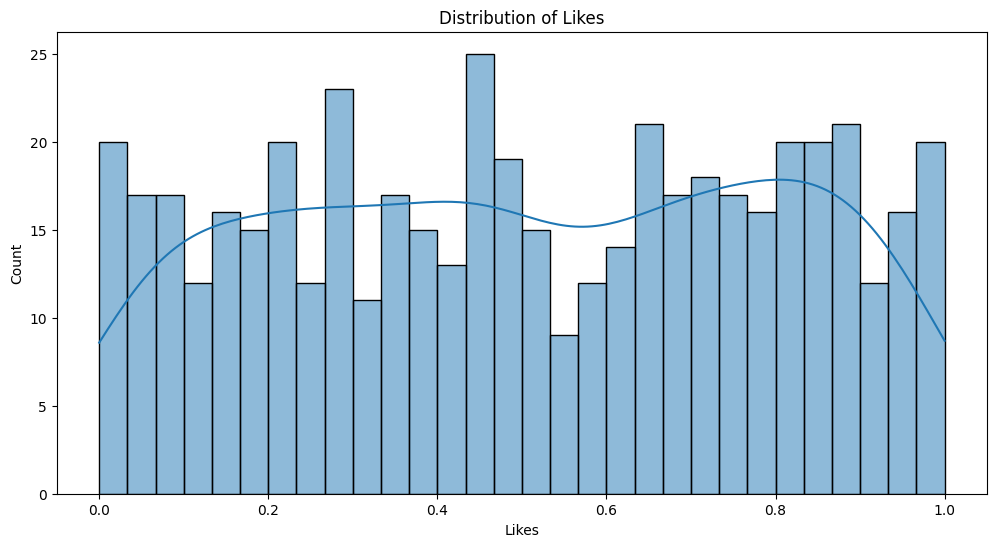

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Likes'], bins=30, kde=True)
plt.title('Distribution of Likes')
plt.show()

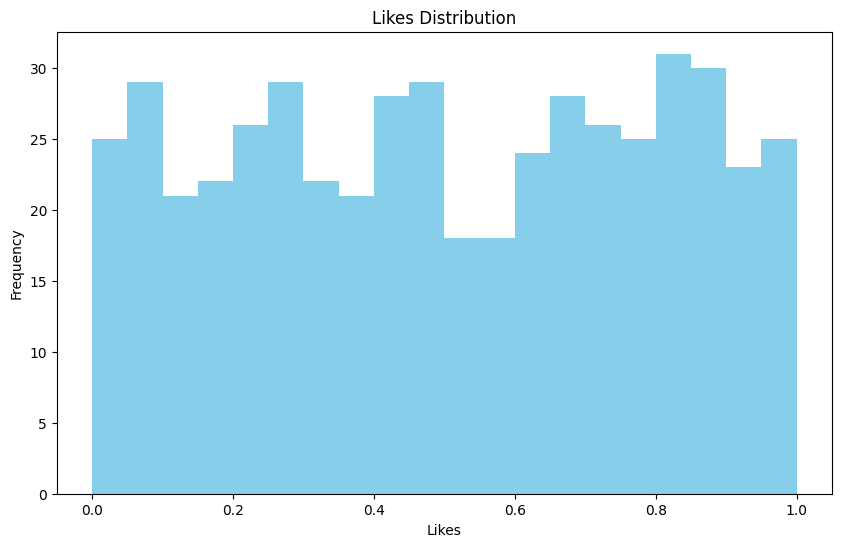

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(data['Likes'], bins=20, color='skyblue')
plt.title('Likes Distribution')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

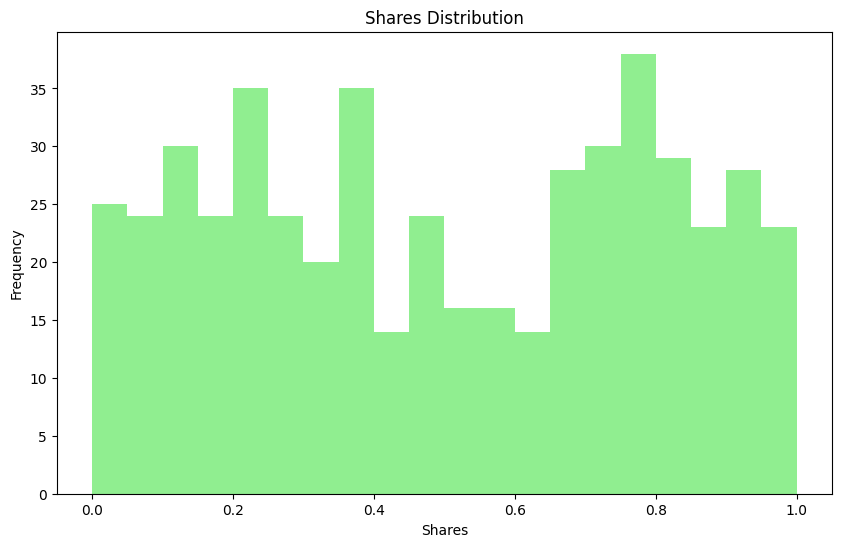

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(data['Shares'], bins=20, color='lightgreen')
plt.title('Shares Distribution')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

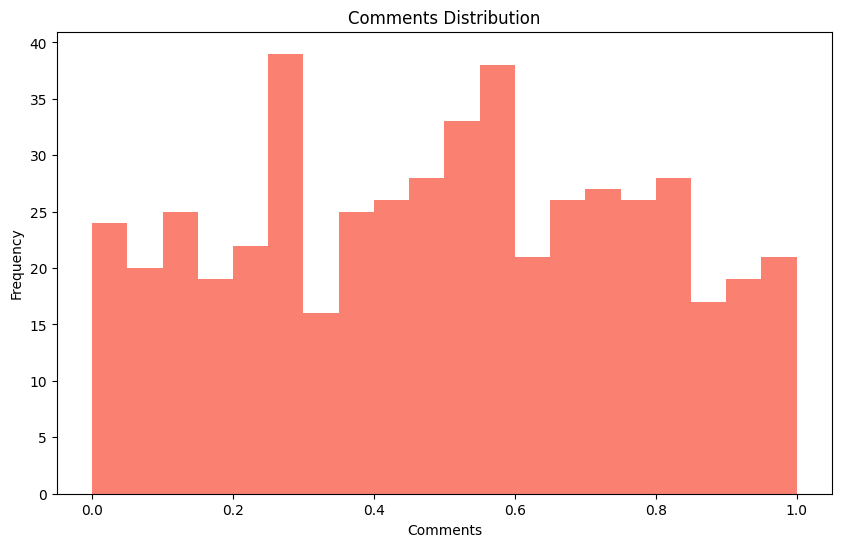

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(data['Comments'], bins=20, color='salmon')
plt.title('Comments Distribution')
plt.xlabel('Comments')
plt.ylabel('Frequency')
plt.show()

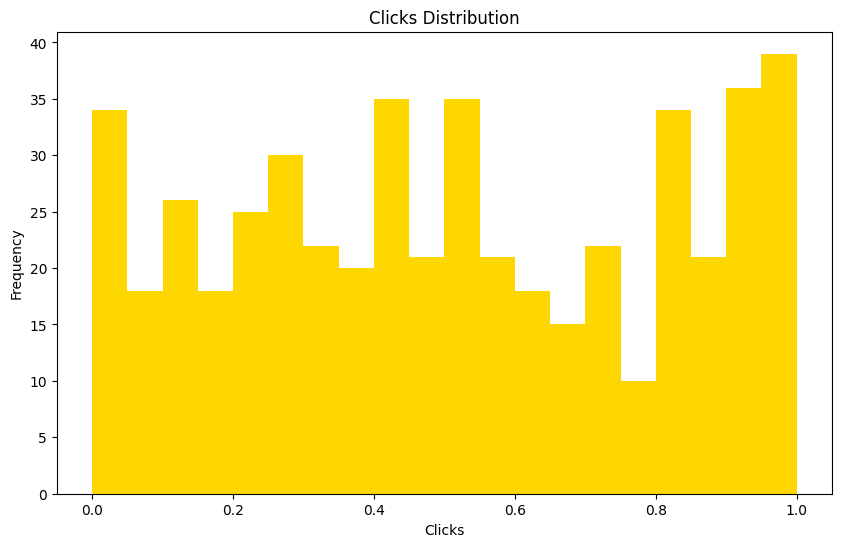

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(data['Clicks'], bins=20, color='gold')
plt.title('Clicks Distribution')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.show()

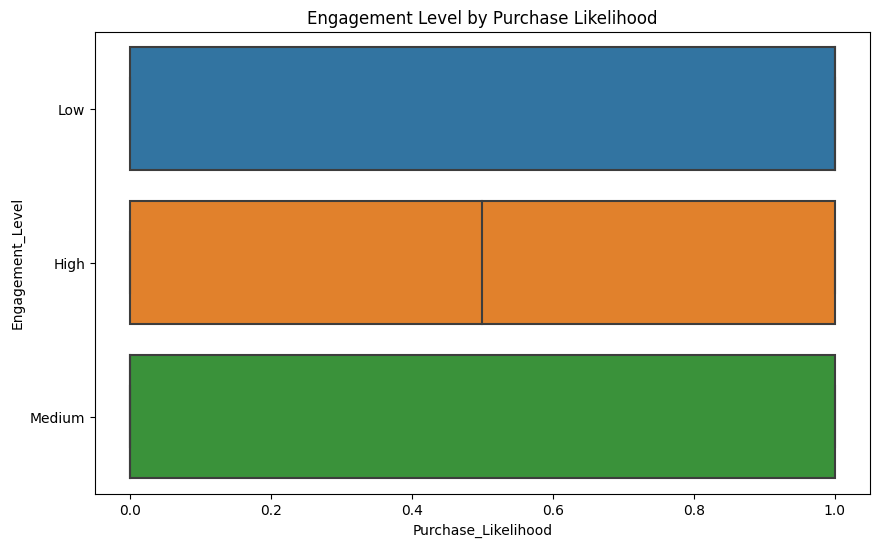

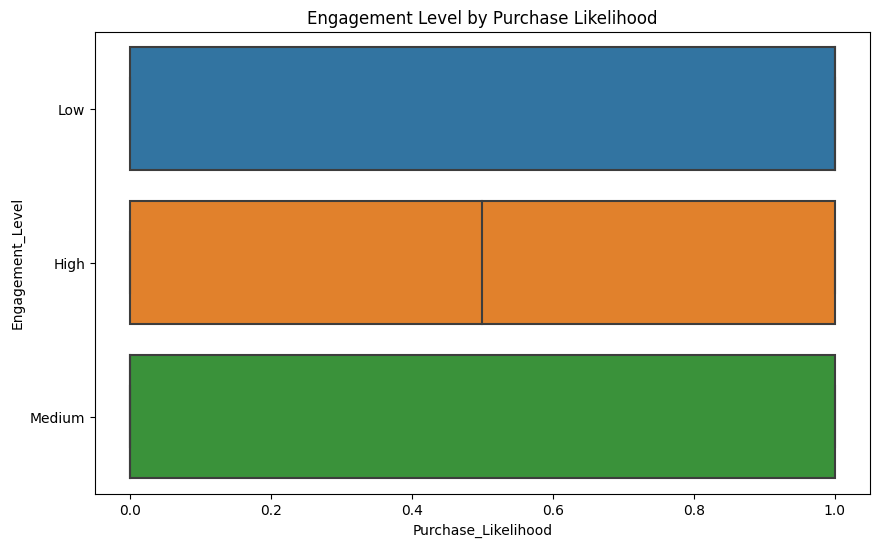

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchase_Likelihood', y='Engagement_Level', data=data)
plt.title('Engagement Level by Purchase Likelihood')
plt.show(0)

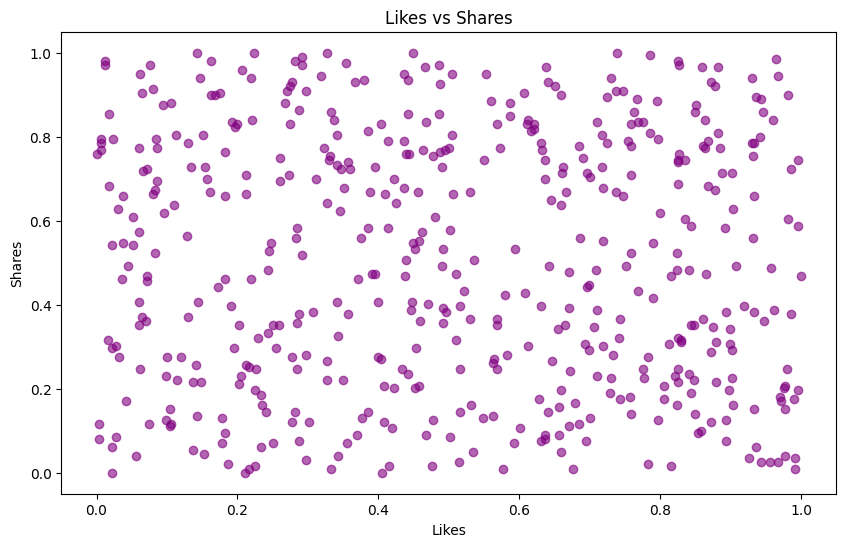

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Likes'], data['Shares'], alpha=0.6, color='purple')
plt.title('Likes vs Shares')
plt.xlabel('Likes')
plt.ylabel('Shares')
plt.show()

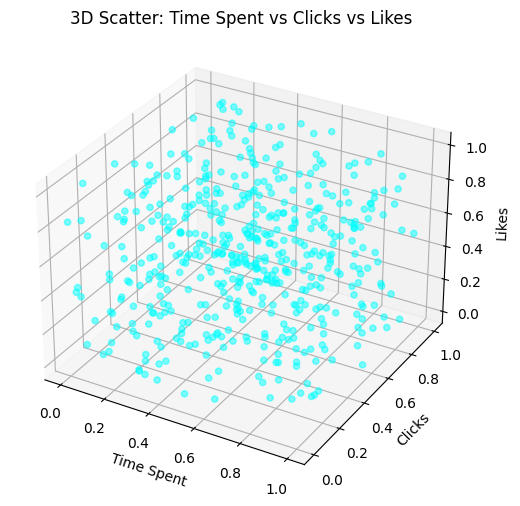

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Time_Spent_on_Platform'], data['Clicks'], data['Likes'], alpha=0.5, c='cyan')
ax.set_title('3D Scatter: Time Spent vs Clicks vs Likes')
ax.set_xlabel('Time Spent')
ax.set_ylabel('Clicks')
ax.set_zlabel('Likes')
plt.show()

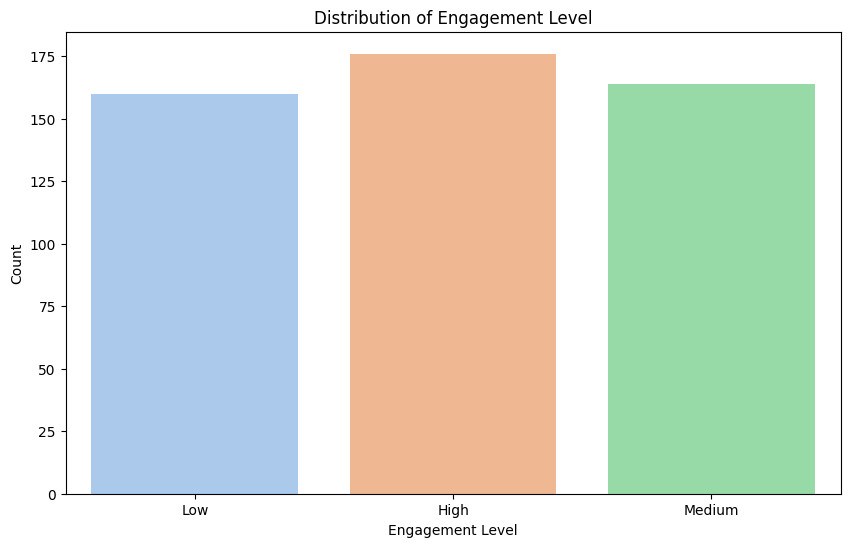

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Engagement_Level', data=data, palette='pastel')
plt.title('Distribution of Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.show()

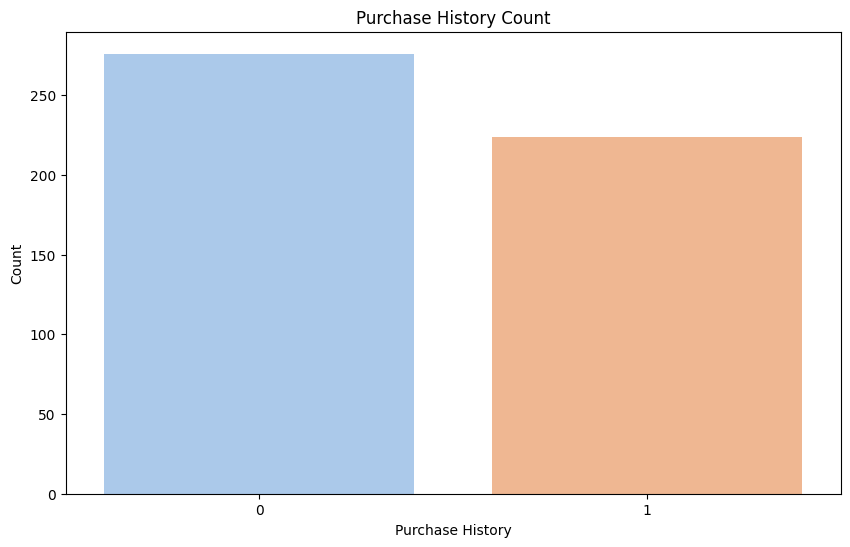

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Purchase_History', data=data, palette='pastel')
plt.title('Purchase History Count')
plt.xlabel('Purchase History')
plt.ylabel('Count')
plt.show()

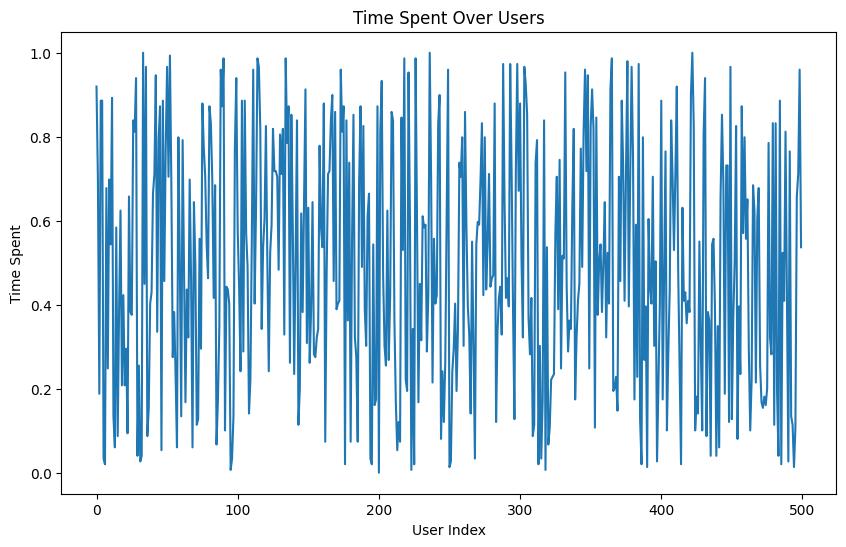

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data['Time_Spent_on_Platform'])
plt.title('Time Spent Over Users')
plt.xlabel('User Index')
plt.ylabel('Time Spent')
plt.show()

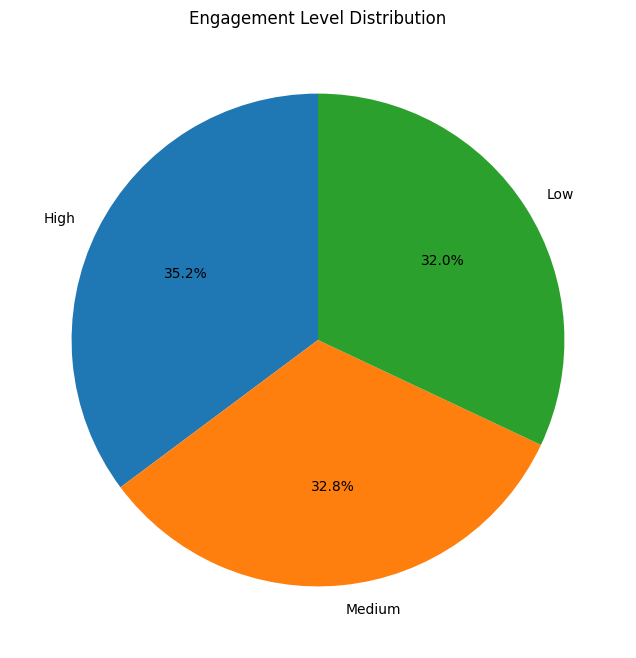

In [20]:
engagement_counts = data['Engagement_Level'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(engagement_counts, labels=engagement_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Engagement Level Distribution')
plt.show()

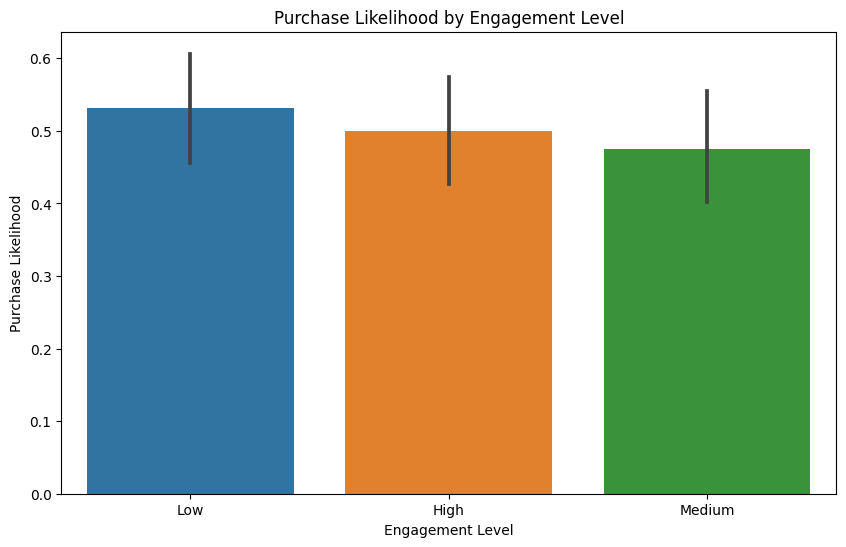

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Engagement_Level', y='Purchase_Likelihood', data=data)
plt.title('Purchase Likelihood by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Purchase Likelihood')
plt.show()

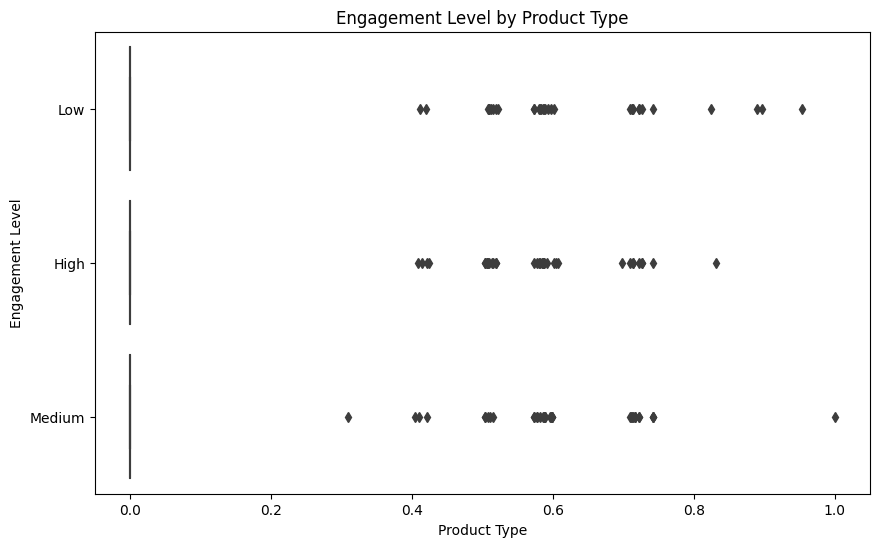

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='product', y='Engagement_Level', data=data)
plt.title('Engagement Level by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Engagement Level')
plt.show()

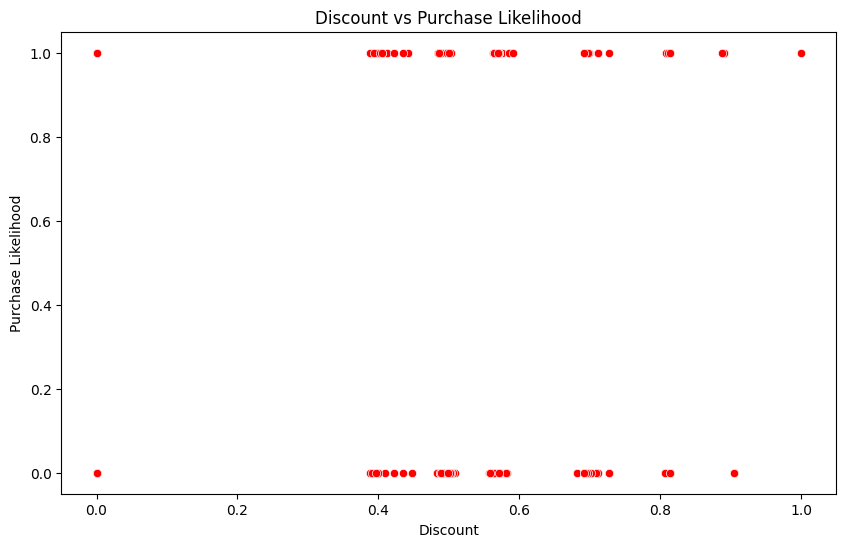

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount', y='Purchase_Likelihood', data=data, color='red')
plt.title('Discount vs Purchase Likelihood')
plt.xlabel('Discount')
plt.ylabel('Purchase Likelihood')
plt.show()

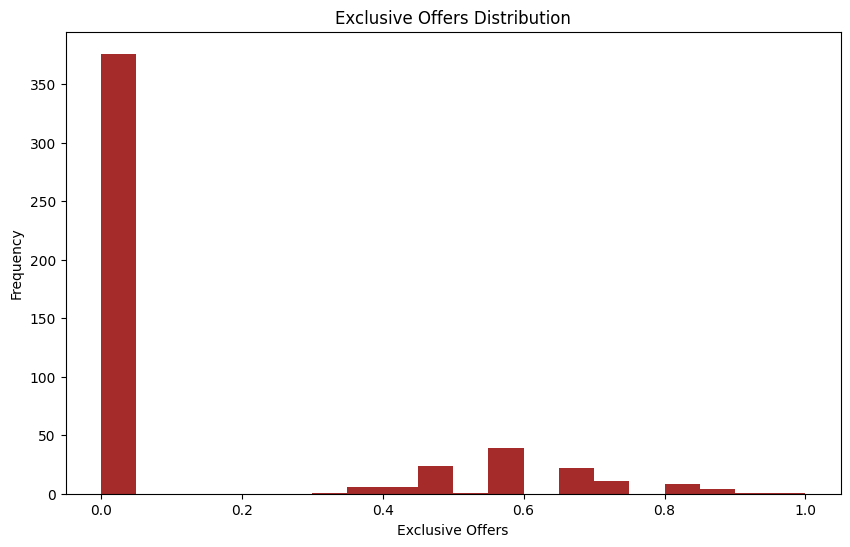

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(data['exclusive'], bins=20, color='brown')
plt.title('Exclusive Offers Distribution')
plt.xlabel('Exclusive Offers')
plt.ylabel('Frequency')
plt.show()

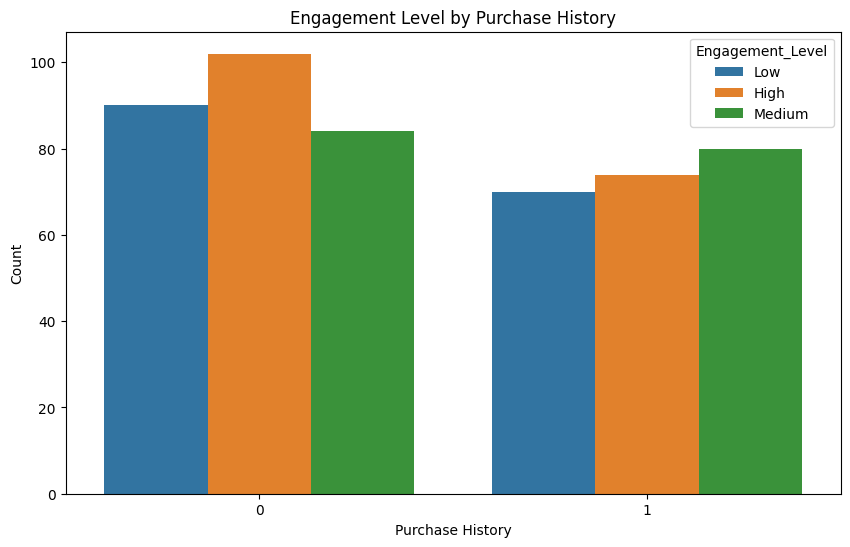

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Purchase_History', hue='Engagement_Level', data=data)
plt.title('Engagement Level by Purchase History')
plt.xlabel('Purchase History')
plt.ylabel('Count')
plt.show()

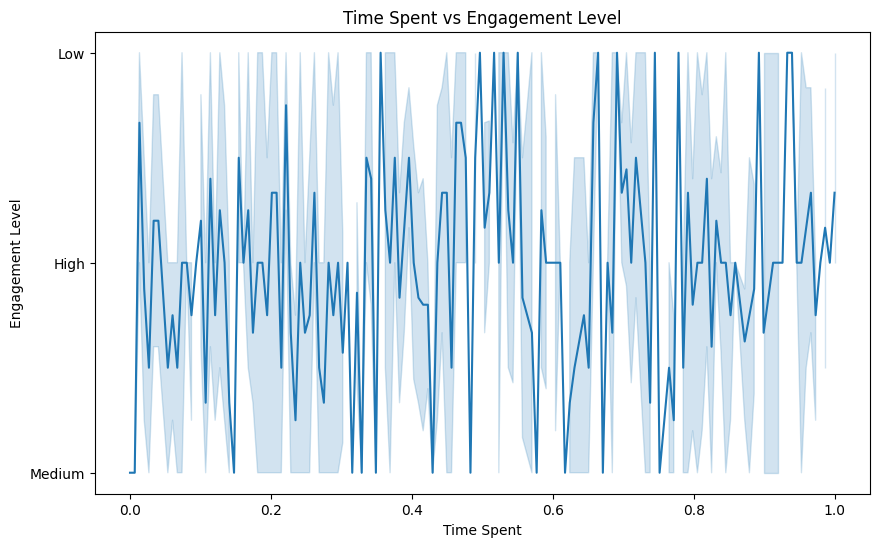

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time_Spent_on_Platform', y='Engagement_Level', data=data)
plt.title('Time Spent vs Engagement Level')
plt.xlabel('Time Spent')
plt.ylabel('Engagement Level')
plt.show()

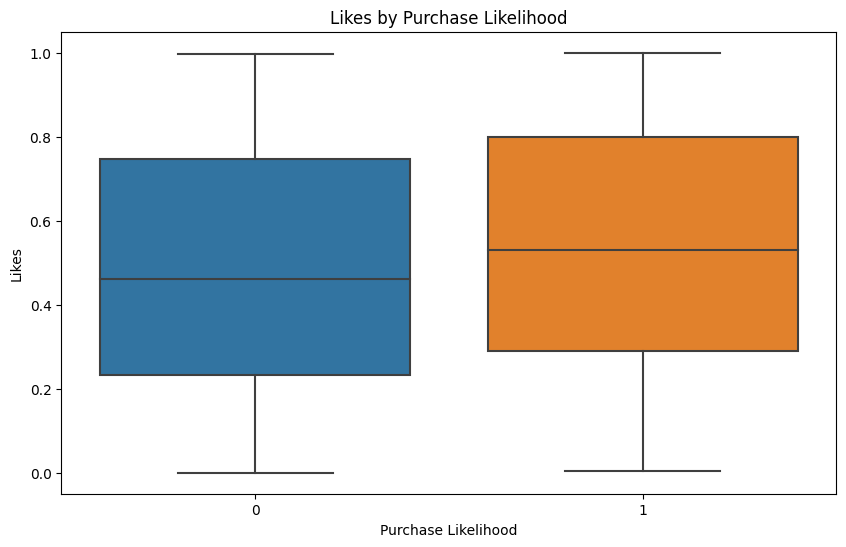

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchase_Likelihood', y='Likes', data=data)
plt.title('Likes by Purchase Likelihood')
plt.xlabel('Purchase Likelihood')
plt.ylabel('Likes')
plt.show()

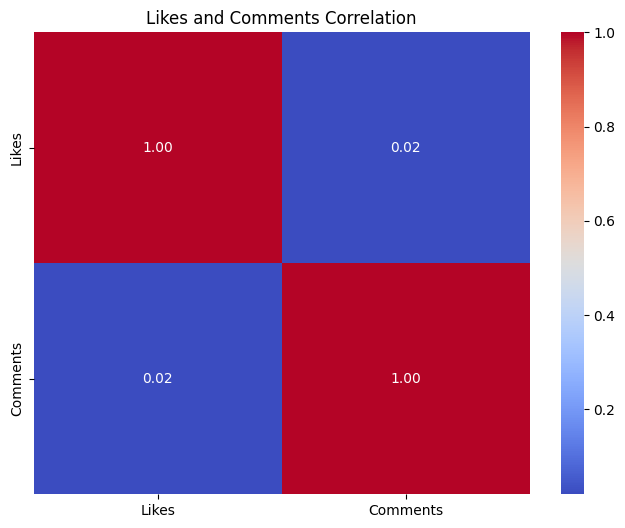

In [28]:
plt.figure(figsize=(8, 6))
likes_comments_corr = data[['Likes', 'Comments']].corr()
sns.heatmap(likes_comments_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Likes and Comments Correlation')
plt.show()

In [29]:
label=LabelEncoder()
data["Engagement_Level"]=label.fit_transform(data["Engagement_Level"])
data.drop(columns="User_ID", inplace=True)
print("Mapping:", dict(zip(label.classes_, label.transform(label.classes_))))

Mapping: {'High': 0, 'Low': 1, 'Medium': 2}


In [30]:
X=data.drop(columns="Purchase_Likelihood")
y=data["Purchase_Likelihood"]

In [31]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # Output as dict for easier access
    return {
        'Confusion Matrix': conf_matrix,
        'Classification Report': report
    }

In [35]:
def apply_machine_learning_models(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(probability=True),
        'Gradient Boosting': GradientBoostingClassifier(),
        'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }

    results = {}

    # Hyperparameter tuning for Random Forest
    rf_param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }
    grid_search_rf = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
    grid_search_rf.fit(X_train, y_train)
    best_rf = grid_search_rf.best_estimator_
    results['Random Forest'] = evaluate_model(best_rf, X_test, y_test)

    # Hyperparameter tuning for Gradient Boosting
    gb_param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7]
    }
    grid_search_gb = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=5)
    grid_search_gb.fit(X_train, y_train)
    best_gb = grid_search_gb.best_estimator_
    results['Gradient Boosting'] = evaluate_model(best_gb, X_test, y_test)

    # Evaluate other models
    for model_name, model in models.items():
        if model_name in ['Random Forest', 'Gradient Boosting']:
            continue  # Skip tuned models
        model.fit(X_train, y_train)
        results[model_name] = evaluate_model(model, X_test, y_test)

    # Voting Classifier with tuned models
    voting_clf = VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', best_rf),
        ('gb', best_gb),
        ('svm', SVC(probability=True))
    ], voting='soft')
    voting_clf.fit(X_train, y_train)
    results['Voting Classifier'] = evaluate_model(voting_clf, X_test, y_test)

    return results

In [36]:
results = apply_machine_learning_models(X_train, X_test, y_train, y_test)

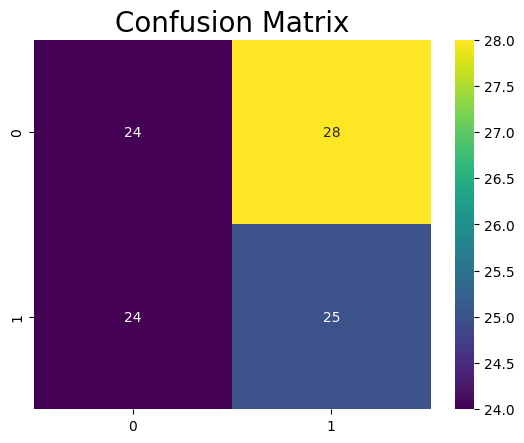

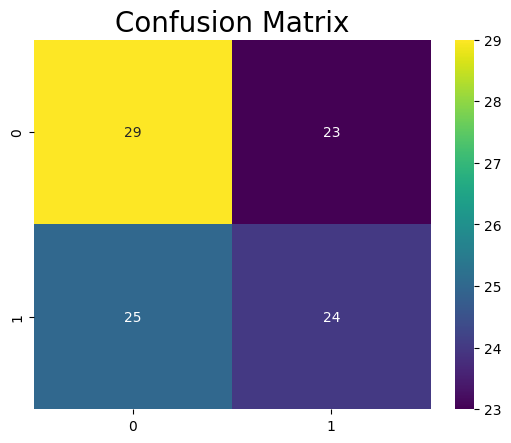

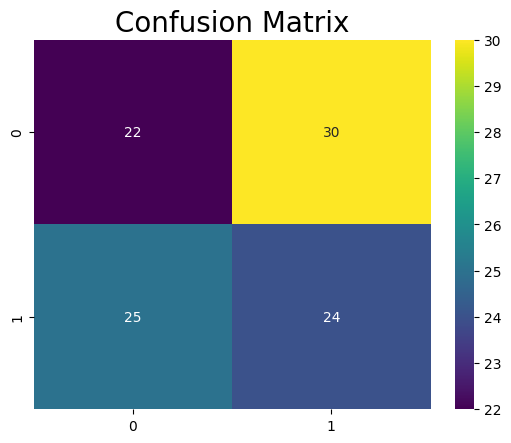

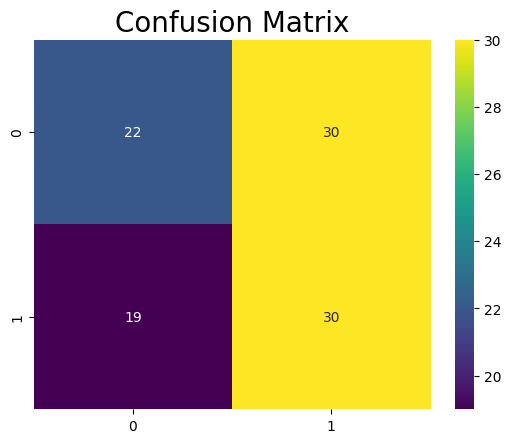

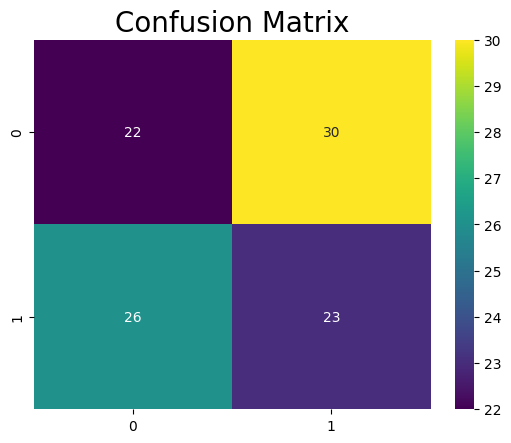

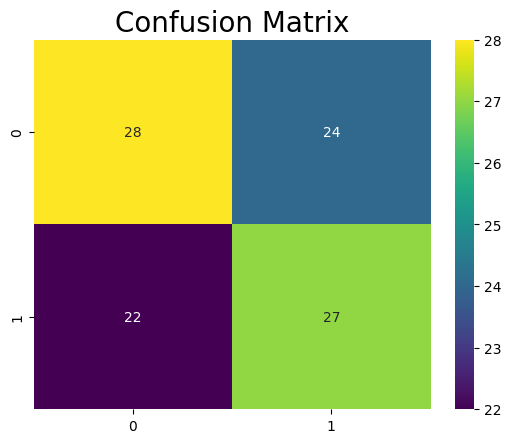

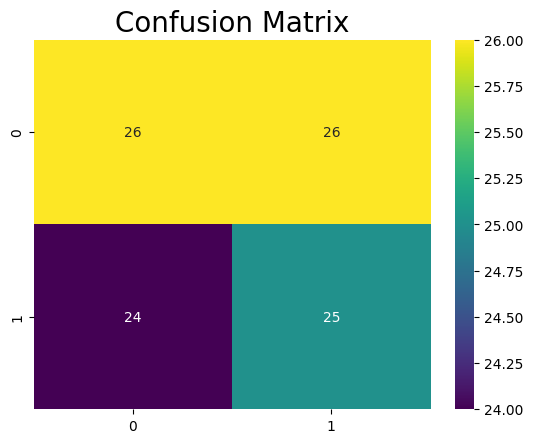

In [37]:
for model, result in results.items():
    conf_mat=result['Confusion Matrix']
    sns.heatmap(conf_mat,annot=True,cmap="viridis",fmt="d")
    plt.title("Confusion Matrix",fontsize=20)
    plt.show()

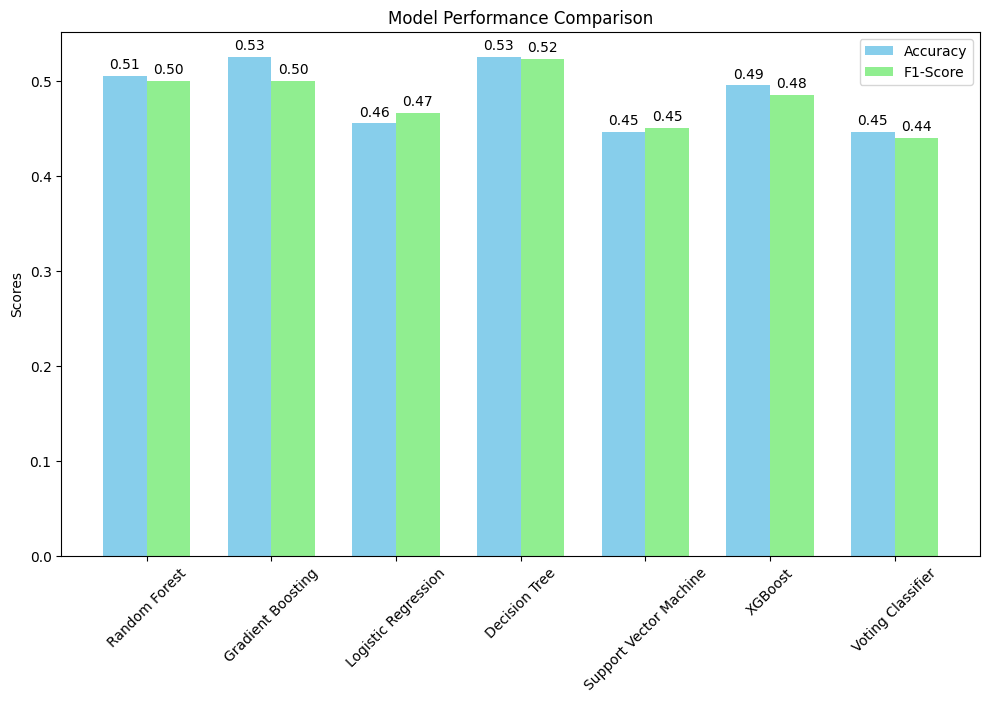

In [38]:
results = {
    'Random Forest': {'accuracy': 0.505, 'f1-score': 0.5},
    'Gradient Boosting': {'accuracy': 0.525, 'f1-score': 0.5},
    'Logistic Regression': {'accuracy': 0.455, 'f1-score': 0.466},
    'Decision Tree': {'accuracy': 0.525, 'f1-score': 0.523},
    'Support Vector Machine': {'accuracy': 0.446, 'f1-score': 0.450},
    'XGBoost': {'accuracy': 0.495, 'f1-score': 0.485},
    'Voting Classifier': {'accuracy': 0.446, 'f1-score': 0.440},
}

# Extracting data for plotting
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]
f1_scores = [results[model]['f1-score'] for model in model_names]

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, f1_scores, width, label='F1-Score', color='lightgreen')

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Adding value annotations on top of each bar
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [39]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# For example, select numerical columns only
features = data.select_dtypes(include=[np.number])
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

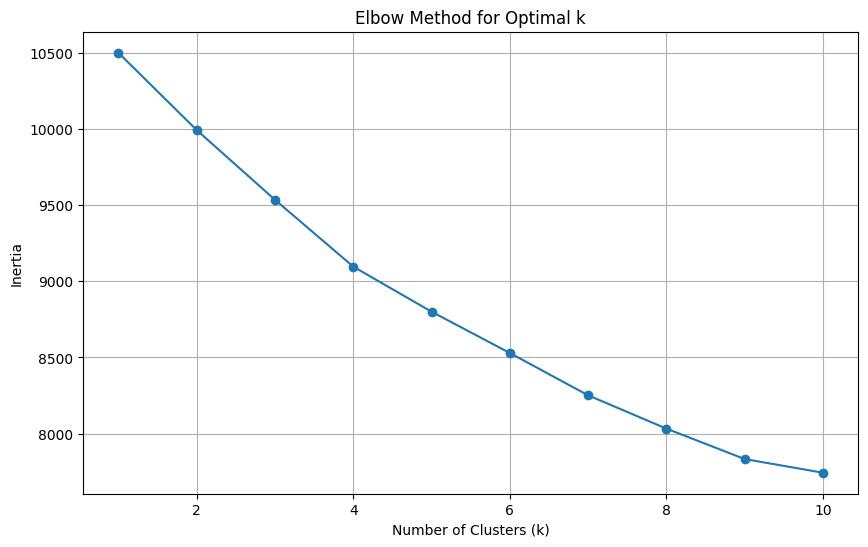

In [40]:
# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Metho
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [41]:
k = 2 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [42]:
data['Cluster'] = clusters

In [43]:
plot_data = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
plot_data['Cluster'] = clusters

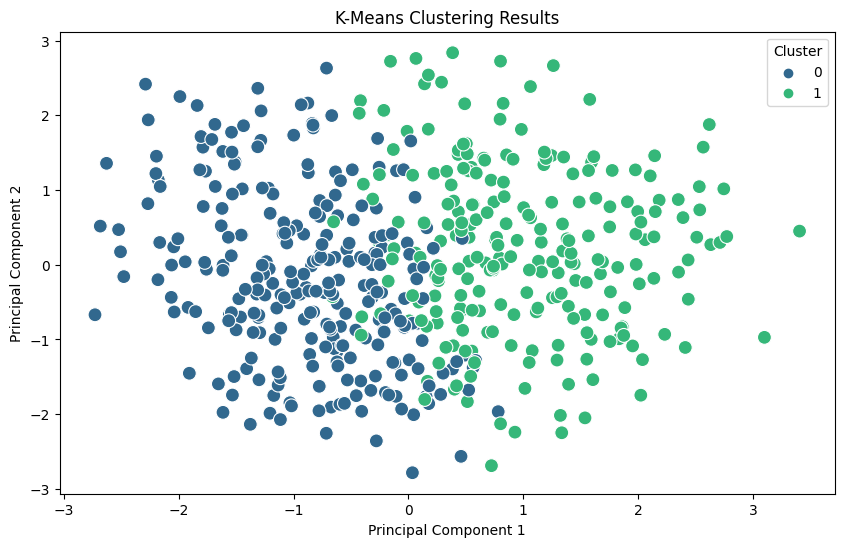

In [44]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [45]:
data['Cluster']

0      1
1      1
2      0
3      1
4      1
      ..
495    0
496    0
497    1
498    1
499    0
Name: Cluster, Length: 500, dtype: int32

In [46]:
data.head()

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Engagement_Level,Purchase_Likelihood,brand,...,deal,discount,exclusive,limited,new,offer,product,sale,shopping,Cluster
0,0.006024,0.768844,0.44,0.26,0.733333,0.919463,0,1,0,0.568071,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.593544,0.000000,0.000000,0.0,1
1,0.841365,0.482412,0.53,0.74,0.466667,0.697987,0,0,1,0.000000,...,0.563362,0.000000,0.000000,0.000000,0.000000,0.594854,0.000000,0.000000,0.0,1
2,0.847390,0.351759,0.43,0.12,0.000000,0.187919,1,1,1,0.000000,...,0.000000,0.491103,0.000000,0.000000,0.489434,0.000000,0.512291,0.000000,0.0,0
3,0.698795,0.291457,0.27,0.76,0.500000,0.885906,0,0,1,0.000000,...,0.000000,0.562483,0.000000,0.582526,0.000000,0.000000,0.586751,0.000000,0.0,1
4,0.548193,0.130653,0.86,0.38,0.700000,0.885906,1,1,1,0.514294,...,0.000000,0.000000,0.495195,0.000000,0.000000,0.000000,0.000000,0.473183,0.0,1


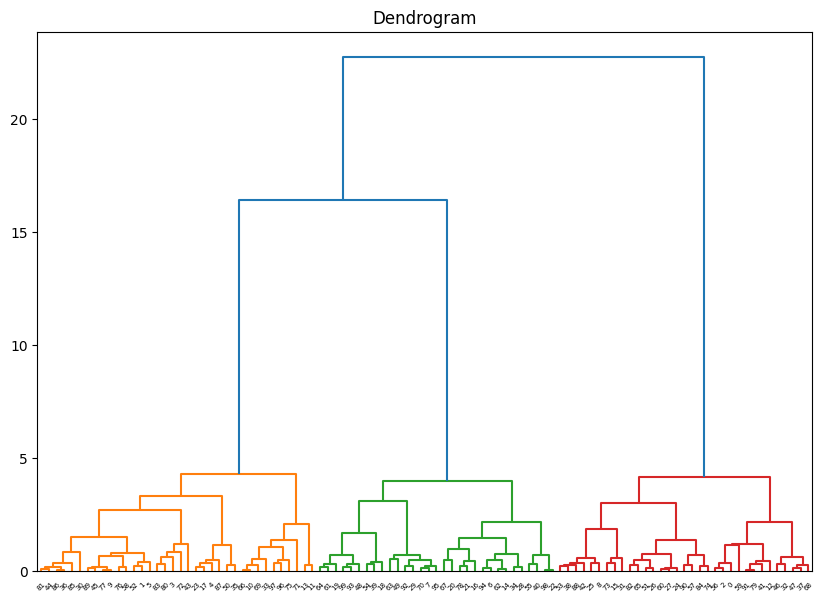

In [47]:
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Perform hierarchical clustering
linked = linkage(X, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xticks(rotation=45)
plt.show()

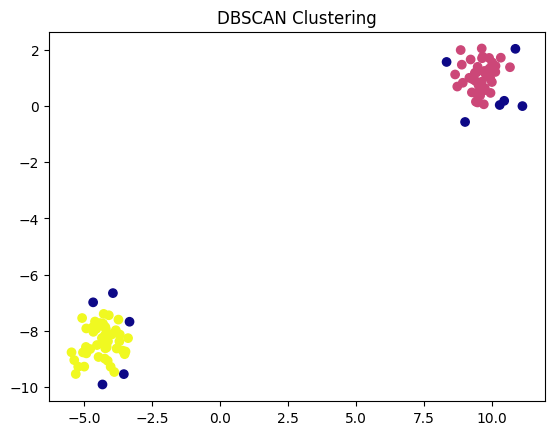

In [48]:
from sklearn.cluster import DBSCAN

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=2, cluster_std=0.60, random_state=45)

# Perform DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.show()

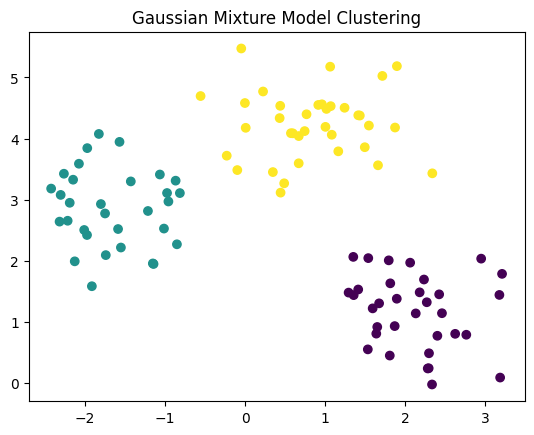

In [49]:
from sklearn.mixture import GaussianMixture

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Fit GMM
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
labels = gmm.predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

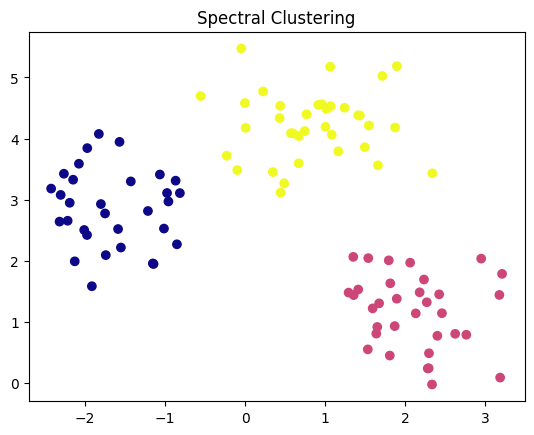

In [50]:
from sklearn.cluster import SpectralClustering

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Perform spectral clustering
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
labels = sc.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title('Spectral Clustering')
plt.show()

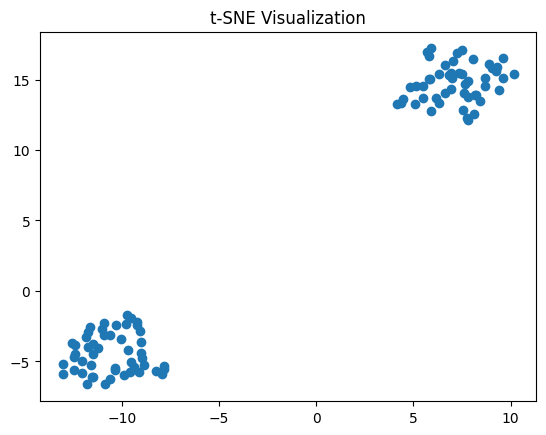

In [51]:
from sklearn.manifold import TSNE

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=2, cluster_std=0.60, random_state=0)

# Apply t-SNE
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X)

# Plot results
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], cmap='viridis')
plt.title('t-SNE Visualization')
plt.show()

In [52]:
!pip install keras

In [53]:
!pip install tensorflow

In [54]:
!pip install --upgrade tensorflow

In [55]:
!pip install tensorflow keras

In [56]:
!python --version

Python 3.7.1


In [57]:
!pip install tensorflow keras

In [60]:
!pip install OrderDict

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for OrderDict: filename=orderdict-2020.12.3-py3-none-any.whl size=1359 sha256=6f6e149592c28ccbfede8b8f0edd5c4c05cd5219184613aac8480f5d190ca1ee
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\c0\9b\aa\85c434d3b57942ab268b93c4878b1d79bceeb158be82c813de
Successfully built OrderDict


In [61]:
import tensorflow as tf
import keras
print(f"TensorFlow version: {tf.__version__}")

ImportError: cannot import name 'OrderedDict' from 'typing' (C:\Users\dell\anaconda3\envs\rstudio\lib\typing.py)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Build autoencoder
input_dim = X.shape[1]
encoding_dim = 2  

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train autoencoder
autoencoder.fit(X, X, epochs=100, batch_size=10, shuffle=True)

In [ ]:
# Encode data
encoder = Model(input_layer, encoded)
X_encoded = encoder.predict(X)

# Plot results
plt.scatter(X_encoded[:, 0], X_encoded[:, 1])
plt.title('Autoencoder Representation')
plt.show()

In [ ]:
from sklearn.cluster import MeanShift

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Perform Mean Shift clustering
mean_shift = MeanShift()
labels = mean_shift.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title('Agglomerative Clustering')
plt.show()

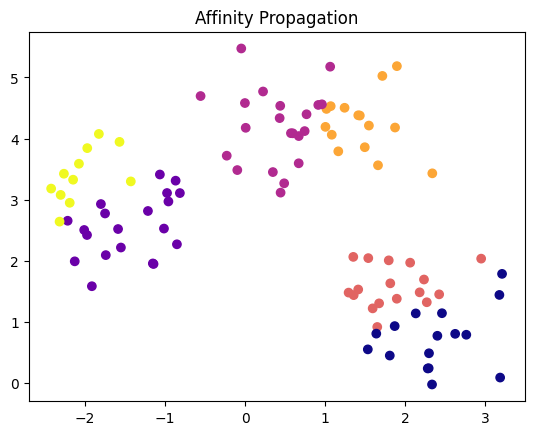

In [62]:
from sklearn.cluster import AffinityPropagation

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Perform Affinity Propagation
affinity = AffinityPropagation()
labels = affinity.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title('Affinity Propagation')
plt.show()

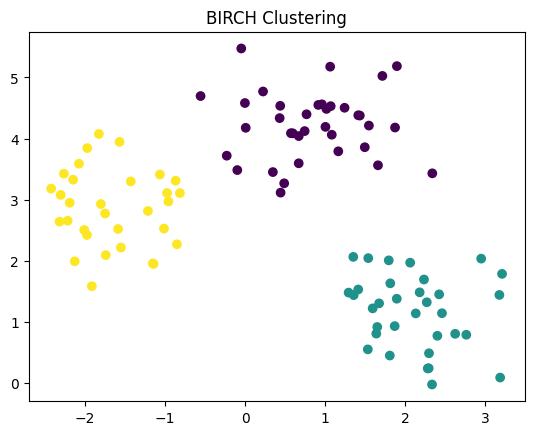

In [63]:
from sklearn.cluster import Birch

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Perform BIRCH clustering
birch = Birch(n_clusters=3)
labels = birch.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('BIRCH Clustering')
plt.show()

In [64]:
! pip install minisom

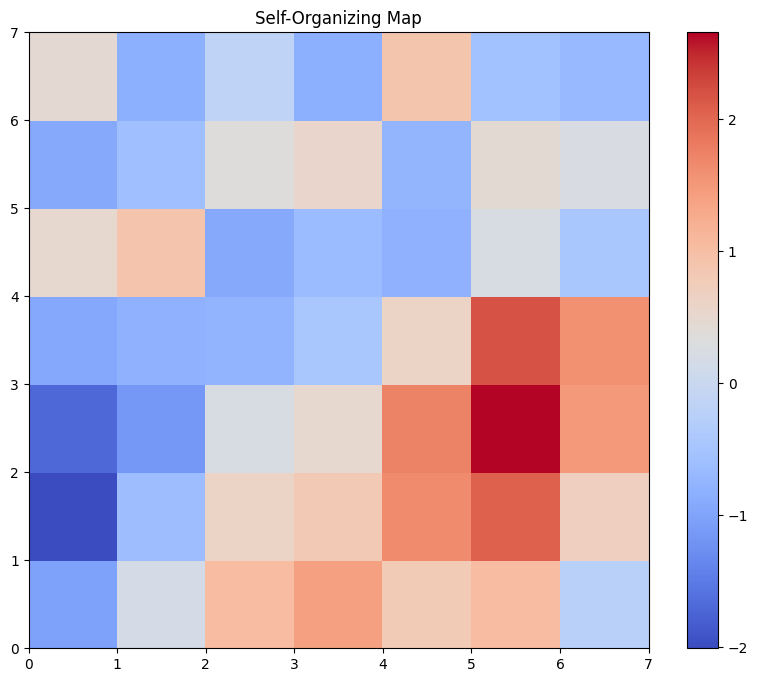

In [65]:
from minisom import MiniSom

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

# Initialize and train SOM
som = MiniSom(7, 7, X.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(X, 100)

# Get the weights
weights = som.get_weights()

# Plot results
plt.figure(figsize=(10, 8))
plt.pcolor(weights[:, :, 0], cmap='coolwarm')
plt.title('Self-Organizing Map')
plt.colorbar()
plt.show()

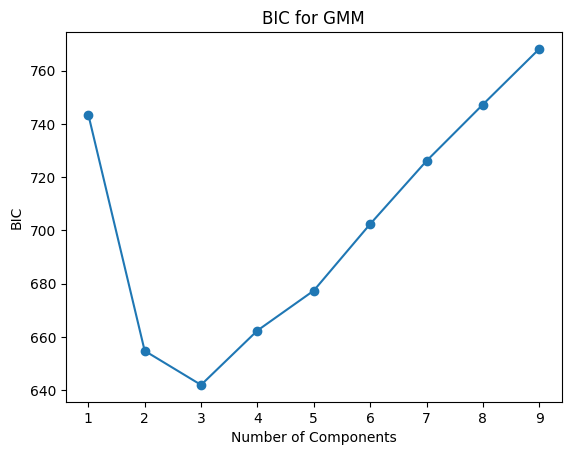

In [66]:
# Fit multiple GMMs with different components
n_components = range(1, 10)
models = [GaussianMixture(n, covariance_type='full').fit(X) for n in n_components]
bics = [model.bic(X) for model in models]

# Plot BIC values
plt.plot(n_components, bics, marker='o')
plt.title('BIC for GMM')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.show()

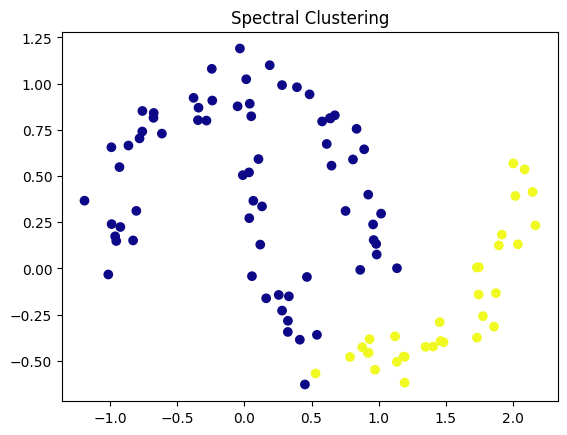

In [67]:
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering


# Generate synthetic data
X, _ = make_moons(n_samples=100, noise=0.1)

# Perform Spectral Clustering
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
labels = sc.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title('Spectral Clustering')
plt.show()

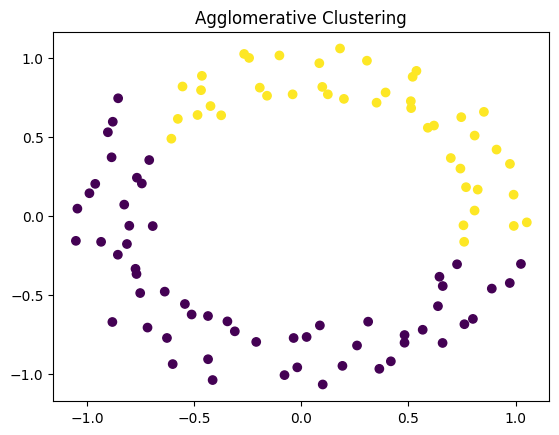

In [68]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data
X, _ = make_circles(n_samples=100, noise=0.05)

# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
labels = agglo.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

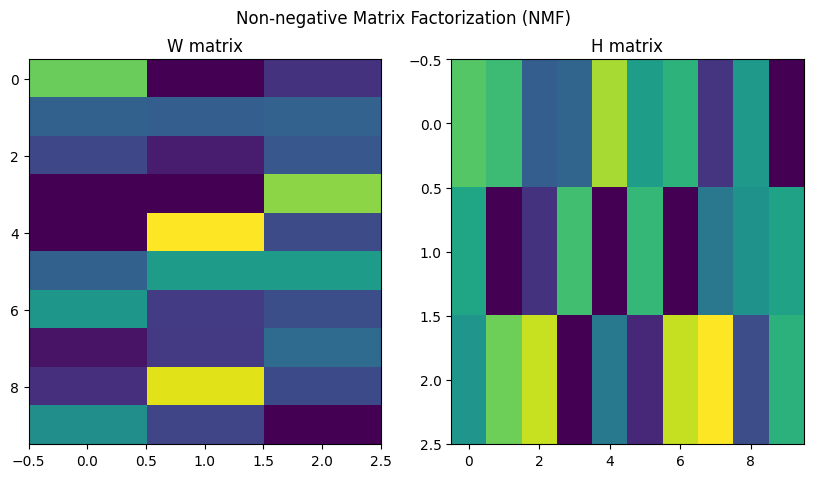

In [69]:
from sklearn.decomposition import NMF

# Generate random data
X = np.random.rand(10, 10)

# Perform NMF
nmf = NMF(n_components=3, random_state=0)
W = nmf.fit_transform(X)
H = nmf.components_

# Plot W and H
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(W, aspect='auto', cmap='viridis')
axes[0].set_title('W matrix')

axes[1].imshow(H, aspect='auto', cmap='viridis')
axes[1].set_title('H matrix')

plt.suptitle('Non-negative Matrix Factorization (NMF)')
plt.show()